In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')
len(df)

9704

Preparing the dataset
Use only the following columns:

'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'

In [7]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

df_num = df[base]
df_num

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail?

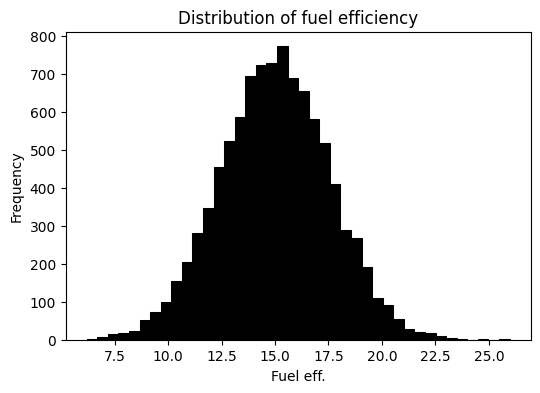

In [8]:
plt.figure(figsize=(6, 4))

sns.histplot(df_num.fuel_efficiency_mpg, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Fuel eff.')
plt.title('Distribution of fuel efficiency')

plt.show()

Question 1
There's one column with missing values. What is it?

'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

In [ ]:
df_num.isnull().sum() # horsepower is the answer

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

Question 2
What's the median (50% percentile) for variable 'horsepower'?

49
99
149
199

In [ ]:
df_num['horsepower'].median()  ## 149

np.float64(149.0)

Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

In [11]:
np.random.seed(42)

n = len(df_num)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_num.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:

With 0
With mean
Both are equally good

In [15]:
# code from lectures but no need to apply the log function
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [12]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [14]:
def prepare_X(df_num, filler):    
    df_num_X = df_num.fillna(filler)
    X = df_num_X.values
    return X

In [16]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [18]:
# when choosing to fill with zeroes:
X_train_0 = prepare_X(df_train, 0)
w_0, w = train_linear_regression(X_train_0, y_train)

X_val = prepare_X(df_val, 0)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(1.1242030472996421e-10)

In [ ]:
# when choosing to fill with the mean:
hp_mean = df_num.horsepower.mean()

X_train_mean = prepare_X(df_train, hp_mean)
w_0_hp_mean, w_hp_mean = train_linear_regression(X_train_mean, y_train)

X_val_hp_mean = prepare_X(df_val, hp_mean)
y_pred_hp_mean = w_0_hp_mean + X_val_hp_mean.dot(w_hp_mean)

rmse(y_val, y_pred) # same result, both equally good



np.float64(1.1242030472996421e-10)

Question 4
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If multiple options give the same best RMSE, select the smallest r.

Options:

0
0.01
1
10
100

In [20]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [27]:
X_val = prepare_X(df_val, 0)
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train_0, y_train, r=r)
    print('r=%5s' % (r))
    y_pred = w_0 + X_val.dot(w)
    print('val', rmse(y_val, y_pred))

r=    0
val 1.1242030472996421e-10
r= 0.01
val 3.2654392514316707e-06
r=  0.1
val 3.224279371204781e-05
r=    1
val 0.0003209189350595968
r=    5
val 0.0016002003225377309
r=   10
val 0.0031905329322569147
r=  100
val 0.03024377220464396


Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

0.001
0.006
0.060
0.600

In [28]:
rsme_scores=[]
for s in range(0, 8): # seeds range
    np.random.seed(s)

    n = len(df_num)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df_num.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    X_train_0 = prepare_X(df_train, 0)
    w_0, w = train_linear_regression(X_train_0, y_train)

    X_val = prepare_X(df_val, 0)
    y_pred = w_0 + X_val.dot(w)

    rsme_scores.append(rmse(y_val, y_pred))

rsme_scores

[np.float64(6.728118903128315e-11),
 np.float64(3.881979991574833e-10),
 np.float64(3.5163573900921545e-10),
 np.float64(1.5887561669937573e-10),
 np.float64(1.0103100198953775e-10),
 np.float64(1.5100566701898262e-10),
 np.float64(2.685960509829076e-10),
 np.float64(6.359932700945219e-11)]

In [32]:
np_rsme_scores = np.array(rsme_scores)
round(np_rsme_scores.std(), 3)


np.float64(0.0)

Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?
Options:

0.15
0.515
5.15
51.5

In [ ]:
    np.random.seed(9)

    n = len(df_num)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df_num.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    
    df_full_train = np.concatenate([df_train, df_val])
    #df_full_train = df_full_train.reset_index(drop=True)    
    X_train_0 = prepare_X(df_full_train, 0)

    y_full_train = np.concatenate([y_train, y_val])

    w_0, w = train_linear_regression_reg(X_train_0, y_train, 0.001)

    X_val = prepare_X(df_val, 0)
    y_pred = w_0 + X_val.dot(w)

    rmse(y_val, y_pred)


AttributeError: 'numpy.ndarray' object has no attribute 'type'